In [2]:
import json as js
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Opening json file
filepath = '/global/projecta/projectdirs/cuore/scratch/vsharma/Tri_proton_decay/High_multiplicity_events_study/GroupedEventsAndTimesM10Count10.json'
filetext = open(filepath, 'r').read()
object = js.loads(filetext)

In [4]:
df = pd.DataFrame(columns = ['totalEnergy', 'timeStamp', 'startTime', 'run', 'multiplicity'])

In [5]:
for event in object:
    df_temp = pd.DataFrame(columns = ['totalEnergy', 'timeStamp', 'startTime', 'run', 'multiplicity'])
    run = event['RunNumber']
    #channels = event['CrystalNumbers']
    energies = event['Energies']
    startTime = event['Time']
    timeStamp = datetime.datetime.fromisoformat(event['GroupedEventDatetime'])
    timeDel = event['TimeDeltas']
    times = [i+startTime for i in timeDel]
    multiplicity = event['Multiplicity']
    energiesFiltered = [i for i in energies if i >= 0] #Removing negative values
    energiesSum = sum(energiesFiltered) 
    avgTime = (startTime + (sum(timeDel)/multiplicity))
    
    #df_temp['channel'] = channels
    row = {'totalEnergy' : energiesSum, 'timeStamp': timeStamp, 'startTime' : startTime, 'run' : run, 'multiplicity': multiplicity}
    df_temp = pd.DataFrame(row, list(range(len([1]))))
    df = pd.concat([df, df_temp], ignore_index=True)

In [6]:
df_runs = df[['run']].drop_duplicates()

In [7]:
df_runs.head()

,run
0,350359
16,350360
83,350361
137,350362
181,350363


In [8]:
df1 = df.query('run==350359')
df2 = df.query('run==350360')
df3 = df.query('run==350361')
df4 = df.query('run==350362')

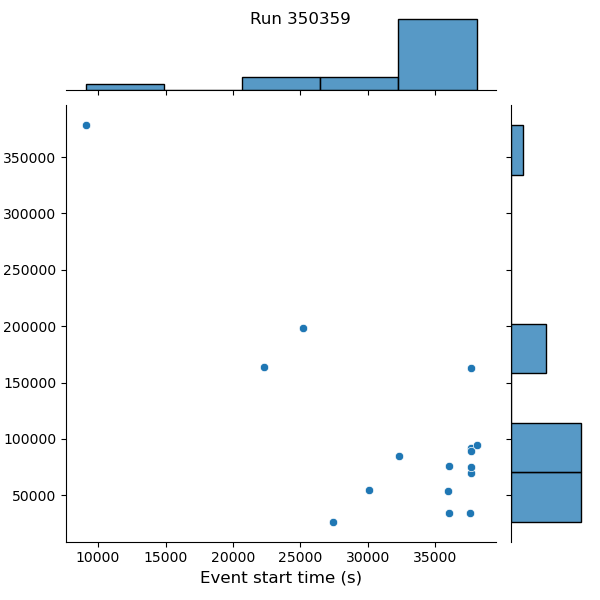

In [9]:
%matplotlib widget
fig_350359 = sns.jointplot(x = df1['startTime'], y = df1['totalEnergy'], kind='scatter')
fig_350359.fig.suptitle("Run 350359")
fig_350359.set_axis_labels('Event start time (s)', 'Energy [keV]', fontsize=12)

In [10]:
df1.head()

,totalEnergy,timeStamp,startTime,run,multiplicity
0,378355.747668,2017-05-11 23:19:46.862826+00:50,9104.862826,350359,111
1,163980.669465,2017-05-12 02:59:48.362840+00:50,22306.36284,350359,28
2,198809.445837,2017-05-12 03:47:49.294775+00:50,25187.294775,350359,64
3,26431.41403,2017-05-12 04:25:26.104126+00:50,27444.104126,350359,20
4,54827.971439,2017-05-12 05:09:15.614809+00:50,30073.614809,350359,87


In [11]:
df1.query('startTime>25000 & startTime<29000 & totalEnergy<50000')

,totalEnergy,timeStamp,startTime,run,multiplicity
3,26431.41403,2017-05-12 04:25:26.104126+00:50,27444.104126,350359,20


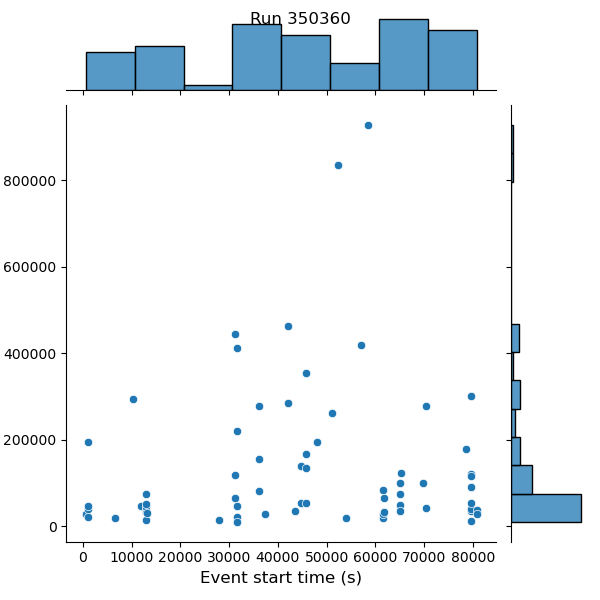

In [12]:
%matplotlib widget
fig_350360 = sns.jointplot(x = df2['startTime'], y = df2['totalEnergy'], kind='scatter')
fig_350360.fig.suptitle("Run 350360")
fig_350360.set_axis_labels('Event start time (s)', 'Energy [keV]', fontsize=12)

In [13]:
df2.query('startTime>10000 & startTime<20000')

,totalEnergy,timeStamp,startTime,run,multiplicity
22,293350.26944,2017-05-13 12:19:20.672784+00:50,10349.672784,350360,206
23,45535.384635,2017-05-13 12:44:05.142775+00:50,11834.142775,350360,19
24,74505.622404,2017-05-13 13:03:58.126881+00:50,13027.126881,350360,31
25,15072.249073,2017-05-13 13:04:02.089095+00:50,13031.089095,350360,19
26,37497.860066,2017-05-13 13:04:03.447540+00:50,13032.44754,350360,18
27,32175.111425,2017-05-13 13:04:04.349942+00:50,13033.349942,350360,39
28,43414.150174,2017-05-13 13:04:08.780017+00:50,13037.780017,350360,28
29,52383.557948,2017-05-13 13:04:08.964534+00:50,13037.964534,350360,67
30,30369.623049,2017-05-13 13:04:25.073902+00:50,13054.073902,350360,28


Text(0.5, 0.98, '350361')

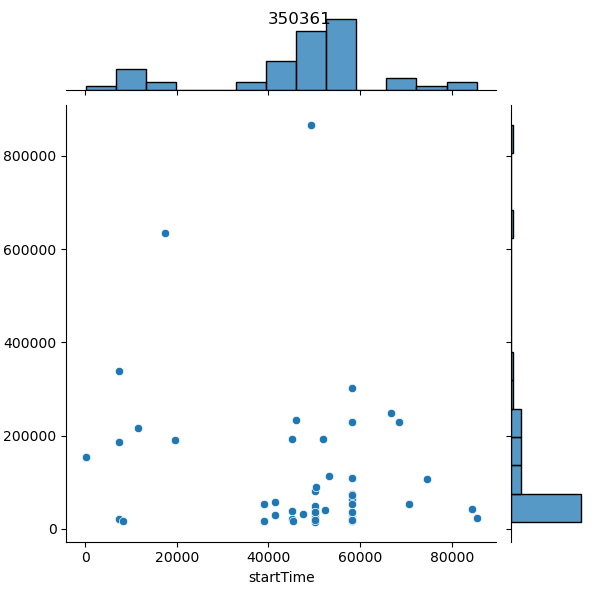

In [14]:
%matplotlib widget
fig_350361 = sns.jointplot(x = df3['startTime'], y = df3['totalEnergy'], kind='scatter')
fig_350361.fig.suptitle("350361")

In [ ]:
df3.query('avgTime>56000 & avgTime<60000')

Text(0.5, 0.98, '350362')

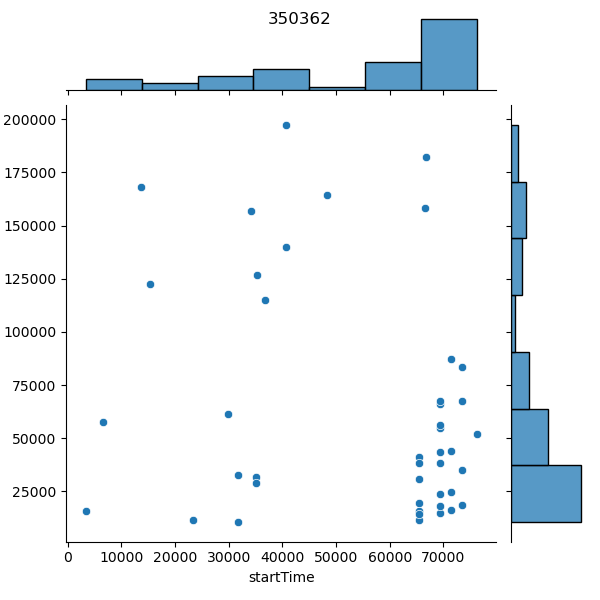

In [24]:
%matplotlib widget
fig_350362 = sns.jointplot(x = df4['startTime'], y = df4['totalEnergy'], kind='scatter')
fig_350362.fig.suptitle("350362")

In [ ]:
%matplotlib widget
sns.histplot(data=df['timeStamp'], bins=10000, #binrange=(0,30),
             alpha=0.5, shrink=1.0)

In [ ]:
%matplotlib widget
sns.histplot(data=df['totalEnergy'], bins=100, binrange=(0,100000), alpha=0.5, shrink=1.0)